In [21]:
import spacy
import pandas as pd
import functions

#using config.cfg for the model with textcat pipeline
#!python -m spacy init fill-config spacy_files/config_sm.cfg spacy_files/config_sm.cfg

#!python -m spacy download en_core_web_sm
#!pip install spacytextblob
#!python -m textblob.download_corpora
#pip install google_trans_new 
#from spacytextblob.spacytextblob import SpacyTextBlob # https://textblob.readthedocs.io/en/dev/api_reference.html#textblob.blob.TextBlob
from google_trans_new import google_translator
import time
from sklearn.metrics import classification_report

In [10]:
import torch
torch.cuda.is_available()

True

# Model 0 training - geolocation

In [26]:
start = time.time()
!python -m spacy train spacy_files/config_sm.cfg --output-path ./model0_geolocation/es_core_news_sm --paths.train ./model0_geolocation/train.spacy --paths.dev ./model0_geolocation/train.spacy
print("--- %s seconds ---" % (time.time() - start))

[2022-08-08 14:58:35,143] [INFO] Set up nlp object from config
[2022-08-08 14:58:35,151] [INFO] Pipeline: ['textcat']
[2022-08-08 14:58:35,153] [INFO] Created vocabulary
[2022-08-08 14:58:35,154] [INFO] Finished initializing nlp object
[2022-08-08 15:01:45,625] [INFO] Initialized pipeline components: ['textcat']


✔ Created output directory: model0_geolocation\es_core_news_sm
ℹ Saving to output directory: model0_geolocation\es_core_news_sm
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['textcat']
ℹ Initial learn rate: 0.001
E    #       LOSS TEXTCAT  CATS_SCORE  SCORE 
---  ------  ------------  ----------  ------
  0       0          0.12       33.34    0.33
  0     200          9.37       62.44    0.62
  0     400          4.72       66.19    0.66
  0     600          3.01       68.27    0.68
  0     800          1.69       70.40    0.70
  0    1000          0.85       71.66    0.72
  0    1200          0.55       72.78    0.73
  0    1400          0.36       73.74    0.74
  0    1600          0.23       74.68    0.75
  0    1800          0.14       75.33    0.75
  0    2000          0.10       76.35    0.76
  0    2200          0.06    

[2022-08-08 14:59:12,054] [INFO] Set up nlp object from config
[2022-08-08 14:59:12,062] [INFO] Pipeline: ['textcat']
[2022-08-08 14:59:12,066] [INFO] Created vocabulary
[2022-08-08 14:59:12,067] [INFO] Finished initializing nlp object
[2022-08-08 15:02:21,752] [INFO] Initialized pipeline components: ['textcat']


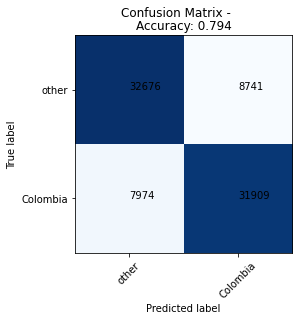

In [27]:
nlp = spacy.load('./model0_geolocation/es_core_news_sm/model-last')
test = pd.read_excel('./model0_geolocation/test.xlsx')
test['text'] = test['text'].astype(str)
test['country_train'] = test['country_train'].astype(str)
test_with_preds = functions.predict_ents(test,nlp, text_col_name='text')
functions.conf_matrix(test_with_preds, cat_col_name='country_train')
test_with_preds.to_excel('./model0_geolocation/test_with_preds.xlsx', index = False)

In [29]:
classification_report(test_with_preds['country_train'], test_with_preds['predicted'], digits=3, output_dict=True)

{'Colombia': {'precision': 0.7889513967694425,
  'recall': 0.8038376383763838,
  'f1-score': 0.7963249540009991,
  'support': 40650},
 'other': {'precision': 0.8000651906827471,
  'recall': 0.7849692496924969,
  'f1-score': 0.7924453329690934,
  'support': 40650},
 'accuracy': 0.7944034440344403,
 'macro avg': {'precision': 0.7945082937260948,
  'recall': 0.7944034440344403,
  'f1-score': 0.7943851434850462,
  'support': 81300},
 'weighted avg': {'precision': 0.7945082937260948,
  'recall': 0.7944034440344403,
  'f1-score': 0.7943851434850462,
  'support': 81300}}

# Model 1 training - valid tweets

In [19]:
!python -m spacy train spacy_files/config_sm.cfg --output-path ./model1_valid/es_core_news_sm --paths.train ./model1_valid/train.spacy --paths.dev ./model1_valid/train.spacy
#Using simple.spacy (data file previously generated in pre-processing.ipynb)

✔ Created output directory: model1_valid\es_core_news_sm
ℹ Saving to output directory: model1_valid\es_core_news_sm
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['textcat']
ℹ Initial learn rate: 0.001
E    #       LOSS TEXTCAT  CATS_SCORE  SCORE 
---  ------  ------------  ----------  ------
  0       0          0.06       53.91    0.54
  0     200          8.17       80.30    0.80
  0     400          4.53       89.35    0.89
  1     600          1.98       94.63    0.95
  1     800          0.80       97.32    0.97
  2    1000          0.45       98.14    0.98
  3    1200          0.19       98.53    0.99
  4    1400          0.10       98.92    0.99
  6    1600          0.05       99.13    0.99
  8    1800          0.03       99.39    0.99
 10    2000          0.02       99.52    1.00
 13    2200          0.01       99.52    

[2022-08-08 14:53:01,597] [INFO] Set up nlp object from config
[2022-08-08 14:53:01,605] [INFO] Pipeline: ['textcat']
[2022-08-08 14:53:01,607] [INFO] Created vocabulary
[2022-08-08 14:53:01,608] [INFO] Finished initializing nlp object
[2022-08-08 14:53:04,547] [INFO] Initialized pipeline components: ['textcat']


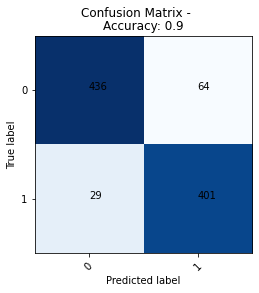

In [20]:
nlp = spacy.load('./model1_valid/es_core_news_sm/model-last')
test = pd.read_excel('./model1_valid/test.xlsx')
test['valid'] = test['valid'].astype(str)
test_with_preds = functions.predict_ents(test,nlp, text_col_name='text_es_clean')
functions.conf_matrix(test_with_preds, cat_col_name='valid')
test_with_preds.to_excel('./model1_valid/test_with_preds.xlsx', index = False)

In [24]:
classification_report(test_with_preds['valid'], test_with_preds['predicted'], digits=3, output_dict=True)

{'0': {'precision': 0.872,
  'recall': 0.9376344086021505,
  'f1-score': 0.9036269430051813,
  'support': 465},
 '1': {'precision': 0.9325581395348838,
  'recall': 0.8623655913978494,
  'f1-score': 0.8960893854748603,
  'support': 465},
 'accuracy': 0.9,
 'macro avg': {'precision': 0.9022790697674419,
  'recall': 0.8999999999999999,
  'f1-score': 0.8998581642400207,
  'support': 930},
 'weighted avg': {'precision': 0.9022790697674419,
  'recall': 0.9,
  'f1-score': 0.8998581642400207,
  'support': 930}}

# Model 2 training - subject

In [16]:
start = time.time()
!python -m spacy train spacy_files/config_sm.cfg --output-path ./model2_subject/es_core_news_sm --paths.train ./model2_subject/train.spacy --paths.dev ./model2_subject/train.spacy
print("--- %s seconds ---" % (time.time() - start))

✔ Created output directory: model2_subject\es_core_news_sm
ℹ Saving to output directory: model2_subject\es_core_news_sm
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['textcat']
ℹ Initial learn rate: 0.001
E    #       LOSS TEXTCAT  CATS_SCORE  SCORE 
---  ------  ------------  ----------  ------
  0       0          0.05        0.00    0.00
  0     200         16.39       19.72    0.20
  1     400          6.33       68.86    0.69
  3     600          2.10       88.43    0.88
  4     800          0.82       95.48    0.95
  7    1000          0.34       98.14    0.98
  9    1200          0.16       99.27    0.99
 12    1400          0.08       99.51    1.00
 16    1600          0.04       99.88    1.00
 21    1800          0.02       99.94    1.00
 27    2000          0.01      100.00    1.00
 34    2200          0.01      100.00

[2022-08-08 14:49:14,472] [INFO] Set up nlp object from config
[2022-08-08 14:49:14,480] [INFO] Pipeline: ['textcat']
[2022-08-08 14:49:14,483] [INFO] Created vocabulary
[2022-08-08 14:49:14,484] [INFO] Finished initializing nlp object
[2022-08-08 14:49:15,585] [INFO] Initialized pipeline components: ['textcat']


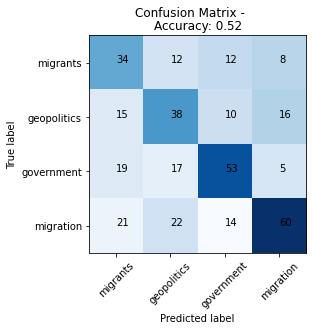

In [18]:
nlp = spacy.load('./model2_subject/es_core_news_sm/model-last')
test = pd.read_excel('./model2_subject/test.xlsx')

test_with_preds = functions.predict_ents(test,nlp, text_col_name='text_es_clean')
functions.conf_matrix(test_with_preds, cat_col_name='referred_to')
test_with_preds.to_excel('./model2_subject/test_with_preds.xlsx', index = False)

# Model 3.1 training - tone 

In [8]:
!python -m spacy train spacy_files/config_sm.cfg --output-path ./model3_tone/es_core_news_sm --paths.train ./model3_tone/train.spacy --paths.dev ./model3_tone/train.spacy
#Using simple.spacy (data file previously generated in pre-processing.ipynb)

✔ Created output directory: model3_tone\es_core_news_sm
ℹ Saving to output directory: model3_tone\es_core_news_sm
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['textcat']
ℹ Initial learn rate: 0.001
E    #       LOSS TEXTCAT  CATS_SCORE  SCORE 
---  ------  ------------  ----------  ------
  0       0          0.07        0.00    0.00
  0     200         12.28       35.96    0.36
  1     400          6.02       70.11    0.70
  2     600          2.48       83.55    0.84
  3     800          1.02       90.05    0.90
  4    1000          0.50       94.08    0.94
  6    1200          0.26       96.21    0.96
  8    1400          0.13       97.00    0.97
 10    1600          0.07       97.76    0.98
 14    1800          0.04       98.10    0.98
 17    2000          0.02       98.34    0.98
 22    2200          0.01       98.72    0.

[2022-08-08 14:40:00,496] [INFO] Set up nlp object from config
[2022-08-08 14:40:00,504] [INFO] Pipeline: ['textcat']
[2022-08-08 14:40:00,506] [INFO] Created vocabulary
[2022-08-08 14:40:00,507] [INFO] Finished initializing nlp object
[2022-08-08 14:40:02,271] [INFO] Initialized pipeline components: ['textcat']


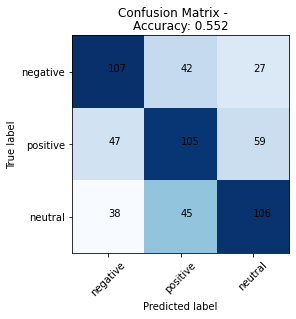

In [9]:
nlp = spacy.load('./model3_tone/es_core_news_sm/model-last')
test = pd.read_excel('./model3_tone/test.xlsx')

test_with_preds = functions.predict_ents(test,nlp, text_col_name='text_es_clean')
functions.conf_matrix(test_with_preds, cat_col_name='text_tone')
test_with_preds.to_excel('./model3_tone/test_with_preds.xlsx', index = False)

# Model 3.2 training - negativeness 

In [6]:
!python -m spacy train spacy_files/config_sm.cfg --output-path ./model4_negativeness/es_core_news_sm --paths.train ./model4_negativeness/train.spacy --paths.dev ./model4_negativeness/train.spacy
#Using simple.spacy (data file previously generated in pre-processing.ipynb)

✔ Created output directory: model4_negativeness\es_core_news_sm
ℹ Saving to output directory: model4_negativeness\es_core_news_sm
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['textcat']
ℹ Initial learn rate: 0.001
E    #       LOSS TEXTCAT  CATS_SCORE  SCORE 
---  ------  ------------  ----------  ------
  0       0          0.02        0.00    0.00
  1     200         14.34       59.10    0.59
  3     400          4.05       89.41    0.89
  6     600          1.25       95.96    0.96
  9     800          0.51       98.26    0.98
 13    1000          0.22       99.20    0.99
 18    1200          0.10       99.54    1.00
 24    1400          0.05       99.66    1.00
 31    1600          0.03       99.89    1.00
 40    1800          0.01       99.89    1.00
 51    2000          0.01       99.89    1.00
 65    2200          0.00  

[2022-08-08 14:33:04,939] [INFO] Set up nlp object from config
[2022-08-08 14:33:04,947] [INFO] Pipeline: ['textcat']
[2022-08-08 14:33:04,949] [INFO] Created vocabulary
[2022-08-08 14:33:04,950] [INFO] Finished initializing nlp object
[2022-08-08 14:33:05,552] [INFO] Initialized pipeline components: ['textcat']


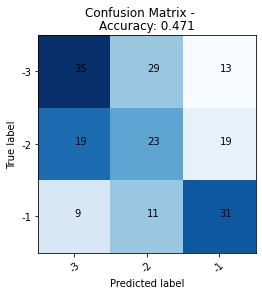

In [7]:
nlp = spacy.load('./model4_negativeness/es_core_news_sm/model-last')
test = pd.read_excel('./model4_negativeness/test.xlsx')
test['tone'] = test['tone'].astype(str)

test_with_preds = functions.predict_ents(test,nlp, text_col_name='text_es_clean')
functions.conf_matrix(test_with_preds, cat_col_name='tone')
test_with_preds.to_excel('./model4_negativeness/test_with_preds.xlsx', index = False)

# Model 3.3 training - positiveness

In [2]:
!python -m spacy train spacy_files/config_sm.cfg --output-path ./model5_positiveness/es_core_news_sm --paths.train ./model5_positiveness/train.spacy --paths.dev ./model5_positiveness/train.spacy
#Using simple.spacy (data file previously generated in pre-processing.ipynb)

ℹ Saving to output directory: model5_positiveness
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['textcat']
ℹ Initial learn rate: 0.001
E    #       LOSS TEXTCAT  CATS_SCORE  SCORE 
---  ------  ------------  ----------  ------
  0       0          0.07        0.00    0.00
  7     200          9.15       94.11    0.94
 16     400          1.11       99.44    0.99
 27     600          0.33       99.44    0.99
 42     800          0.13      100.00    1.00
 59    1000          0.06      100.00    1.00
 81    1200          0.03      100.00    1.00
107    1400          0.01      100.00    1.00
139    1600          0.01      100.00    1.00
178    1800          0.00      100.00    1.00
227    2000          0.00      100.00    1.00
285    2200          0.00      100.00    1.00
352    2400          0.00      100.00    1.00
✔ Saved pipelin

[2022-08-08 14:28:32,140] [INFO] Set up nlp object from config
[2022-08-08 14:28:32,148] [INFO] Pipeline: ['textcat']
[2022-08-08 14:28:32,150] [INFO] Created vocabulary
[2022-08-08 14:28:32,152] [INFO] Finished initializing nlp object
[2022-08-08 14:28:32,300] [INFO] Initialized pipeline components: ['textcat']


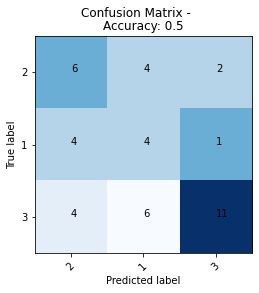

In [3]:
nlp = spacy.load('./model5_positiveness/es_core_news_sm/model-last')
test = pd.read_excel('./model5_positiveness/test.xlsx')
test['pos_tone'] = test['pos_tone'].astype(str)

test_with_preds = functions.predict_ents(test,nlp, text_col_name='text_es_clean')
functions.conf_matrix(test_with_preds, cat_col_name='pos_tone')
test_with_preds.to_excel('./model5_positiveness/test_with_preds.xlsx', index = False)